<Figure size 432x288 with 0 Axes>

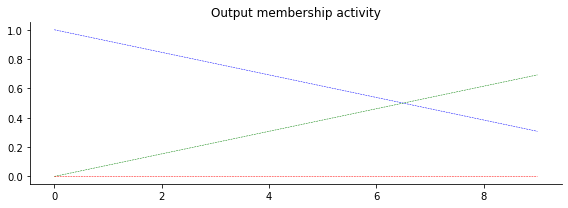

In [15]:
import os
from pylab import *
import numpy as np
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt

x_qual = np.arange(0, 10, 1)
x_serv = np.arange(0, 10, 1)
x_tip  = np.arange(0, 10, 1)

qual_lo = fuzz.trimf(x_qual, [0,0,5])
qual_md = fuzz.trimf(x_qual, [0,5,10])
qual_hi = fuzz.trimf(x_qual, [5,10,10])
serv_lo = fuzz.trimf(x_serv, [0,0,5])
serv_md = fuzz.trimf(x_serv, [0,5,10])
serv_hi = fuzz.trimf(x_serv, [5,10,10])
tip_lo  = fuzz.trimf(x_tip, [0,0,13])
tip_md  = fuzz.trimf(x_tip, [0,13,25])
tip_hi  = fuzz.trimf(x_tip, [13,25,25])

# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz. interp_membership exists for!
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

tip_activation_lo = np.fmin(active_rule1, tip_lo)
tip_activation_md = np.fmin(active_rule1, tip_md)

active_rule3 = np.fmax(qual_level_hi, tip_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# Visualize this
fig = plt.figure()
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

